In [1]:
import numpy as np
import control                   
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg
import sympy as sp

import sys
sys.path.append('../')
from control_utils import *

from IPython.display import display, Markdown, Latex

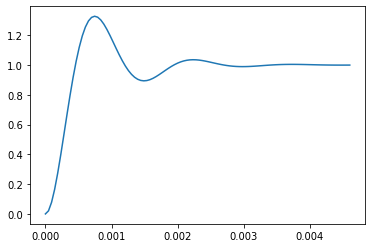

In [2]:
# Valores do circuito
R1 = 10000
R2 = 5000
C1 = 10e-9
C2 = 100e-9

# Definição do sistema
A = np.array([[0, 1/(R2*C1)], [-1/(R1*C2), (-R1-R2)/(R1*R2*C2)]])
B = np.array([[0], [1/(R1*C2)]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys_ss = control.ss(A, B, C, D)
t, y = control.step_response(sys_ss)
plt.plot(t, y)

In [3]:
# Valores do circuito
R = 1
L = 1
C = 1

# Definição do sistema
_A = np.array([[0, 1], [-1/(L*C), -1/(R*C)]])
_B = np.array([[0], [1/L]])
_C = np.array([[1, 0]])
_D = np.array([[0]])

sys_ss = control.ss(_A, _B, _C, _D)

In [4]:
sys_s = control.ss2tf(sys_ss)
sys_s_2 = control.tf([R], [L*R*C, L, R])

sys_ss_2 = control.tf2ss(sys_s)

display(Latex('''
Podemos encontrar a FT manualmente (analisando o circuito), obtendo:
$$
\\frac{Y(s)}{X(s)} = \\frac{\\frac{1}{sC}||R}{\\frac{1}{sC}||R + sL} \\\\
\\frac{Y(s)}{X(s)} = \\frac{R}{s^2LRC + sL + R} 
$$
'''
))

display(Latex('Para os valores escolhidos, as equações se tornam:'))
display(Latex('Sistema original em espaço de estados: ' + sys_ss._repr_latex_()))
display(Latex('Sistema convertido para domínio s: ' + sys_s._repr_latex_()))
display(Latex('Sistema no domínio s (manual): ' + control.tf(sys_s_2)._repr_latex_()))
display(Latex('Sistema convertido de volta para ss: ' + sys_ss_2._repr_latex_()))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'Mp': 16.051507708627778,
 'tp': 3.6270000000000002,
 'ts5': 5.26,
 'ts2': 8.23,
 'tr': 1.6420000000000001,
 'td': 1.296,
 'ess': -0.002170116739101724,
 'final_value_step_simulated': 1.0021701167391017,
 'final_value_step_theoretical': -1}

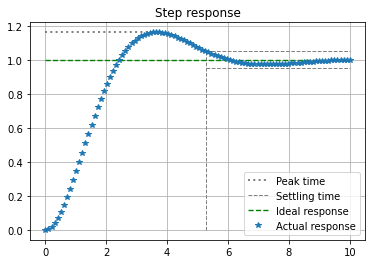

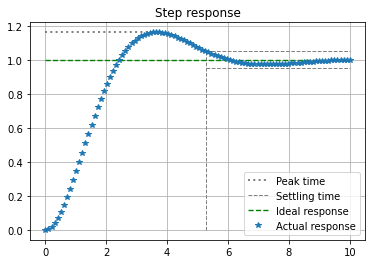

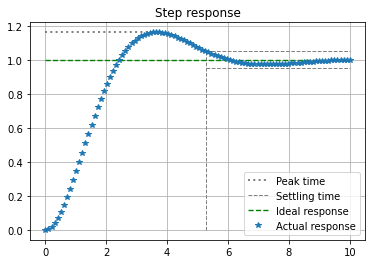

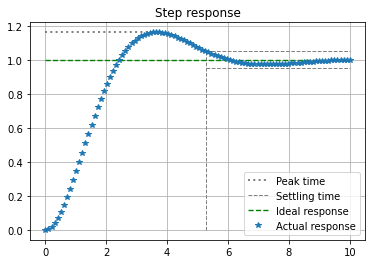

In [5]:
# Comparação das respostas
# Como vemos, são todas equivalentes
step_info(sys_ss, 10)
plt.figure()
step_info(sys_s, 10)
plt.figure()
step_info(sys_s_2, 10)
plt.figure()
step_info(sys_ss_2, 10)